In [2]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

plt.style.use("bmh")

Text(-0.4, 0.23, 'Direct')

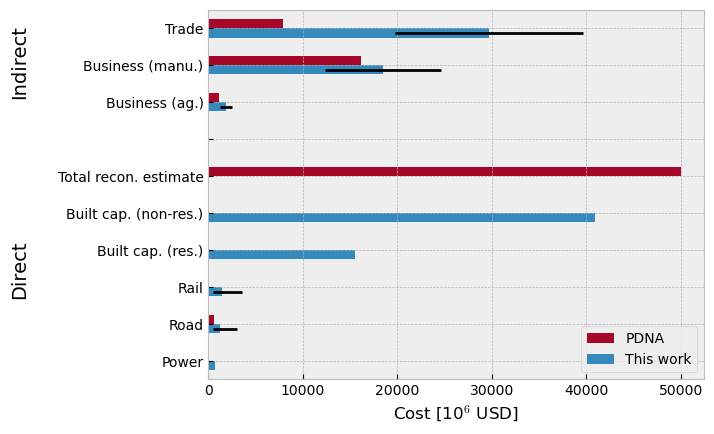

In [80]:
column_names = [                 "This work", "PDNA", "This work [-err]", "This work [+err]", "PDNA [-err]", "PDNA [+err]"]
data = {
    "Power": [                           660,     80,                  0,                  0,             0,             0],
    "Road": [                           1200,    644,         1200 - 440,        3000 - 1200,             0,             0],
    "Rail": [                           1400,     98,         1400 - 490,        3600 - 1400,             0,             0],
    "Built cap. (res.)": [             15500, np.nan,                  0,                  0,             0,             0],
    "Built cap. (non-res.)": [         40900, np.nan,                  0,                  0,             0,             0],
    "Total recon. estimate": [        np.nan,  50000,                  0,                  0,             0,             0],
    "": [                                  0,      0,                  0,                  0,             0,             0],
    "Business (ag.)": [   135 * (1/12 * 164),   1100,  45 * (1/12 * 164),  45 * (1/12 * 164),             0,             0],
    "Business (manu.)": [135 * (10/12 * 164),  16200, 45 * (10/12 * 164), 45 * (10/12 * 164),             0,             0],
    "Trade": [                     135 * 220,   7900,           45 * 220,           45 * 220,             0,             0],
}
df = pd.DataFrame(data=data, index=column_names).T
# error shape is (2, 2, 10)
# that is...     ((This work, PDNA), (min, max), (quantity0, quantity2, ..., quantity9))
# there is probably a better way to assemble this
# ... sorry
errors = np.hstack(
    [
        df.loc[:, ["This work [-err]", "PDNA [-err]"]].values.T[:, np.newaxis],
        df.loc[:, ["This work [+err]", "PDNA [+err]"]].values.T[:, np.newaxis]
    ]
)
f, ax = plt.subplots()
df.loc[:, ["This work", "PDNA"]].plot.barh(
    ax=ax,
    xerr=errors
)
handles, labels = ax.get_legend_handles_labels()
# reverse order of legend entries to correspond with bars
ax.legend(handles[::-1], labels[::-1], title="", loc="lower right")
ax.set_xlabel(r"Cost [10$^{6}$ USD]")
ax.set_ylabel("")
ax.text(-0.4, 0.77, "Indirect", rotation=90, transform=ax.transAxes, size=14)
ax.text(-0.4, 0.23, "Direct", rotation=90, transform=ax.transAxes, size=14)
#ax.set_xlim(0, 4000)